In [18]:
from torchvision import datasets, transforms

full = datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transforms.ToTensor()
)
test = datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transforms.ToTensor()
)
print(len(full), len(test))

60000 10000


In [19]:
image, label = full[0]
print(image.shape)
print(image.max().item())
print(label)

torch.Size([1, 28, 28])
1.0
9


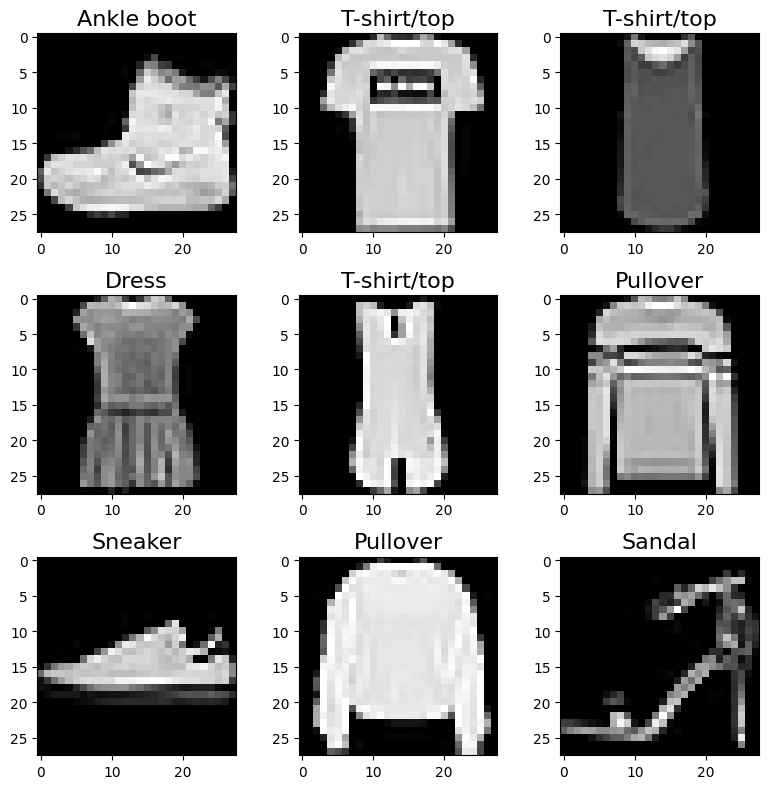

In [20]:
import matplotlib.pyplot as plt

def show_images(dataset):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        image, label = dataset[i]
        image = image.permute(1, 2, 0)
        plt.subplot(3, 3, i+1)
        plt.imshow(image, cmap='gray', interpolation='none')
        plt.title(f"{dataset.classes[label]}", fontsize=16)
    plt.tight_layout()
    plt.show()

show_images(full)

In [21]:
from torchvision import datasets

full = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transforms.ToTensor()
)
test = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transforms.ToTensor()
)
print(len(full), len(test))

50000 10000


In [22]:
image, label = full[0]
print(image.shape)
print(image.max().item())
print(label)

torch.Size([3, 32, 32])
1.0
6


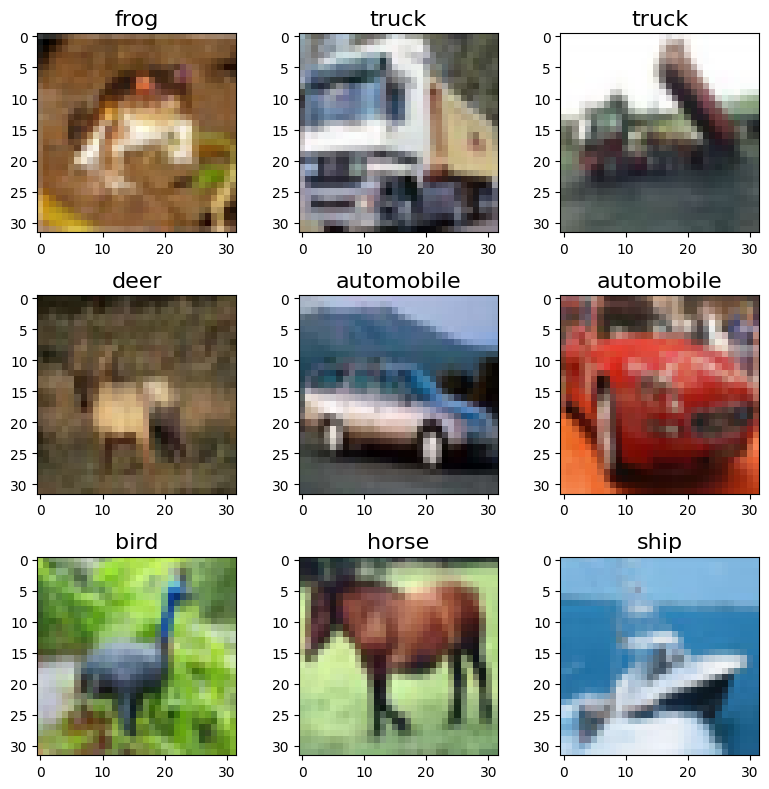

In [23]:
show_images(full)

In [24]:
full = datasets.FashionMNIST(root='./data', train=True, download=True)
test = datasets.FashionMNIST(root='./data', train=False, download=True)
print(len(full), len(test))
print(type(full), full[0])

60000 10000
<class 'torchvision.datasets.mnist.FashionMNIST'> (<PIL.Image.Image image mode=L size=28x28 at 0x1073AC6D0>, 9)


In [25]:
import torch
from torch.utils.data import random_split

def train_val_split(full, valid_size=10000):
    train_size = len(full) - valid_size
    train, valid = random_split(
        full, [train_size , valid_size],
        generator=torch.Generator().manual_seed(42)
    )

    return train, valid

train, valid = train_val_split(full)
print(len(train), len(valid))

50000 10000


In [26]:
from torch.utils.data import Dataset

class PackDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

train = PackDataset(train, transform=transforms.Compose([transforms.ToTensor()]))
valid = PackDataset(valid, transform=transforms.Compose([
    transforms.ToTensor(), transforms.Resize(size=227)
]))

img1, _ = train[0]
img2, _ = valid[0]
print(img1.shape, type(img1))
print(img2.shape, type(img2))

torch.Size([1, 28, 28]) <class 'torch.Tensor'>
torch.Size([1, 227, 227]) <class 'torch.Tensor'>


In [27]:
from PIL import Image
import numpy as np
from IPython.display import display

def show_tensor_image(tensor):
    if not isinstance(tensor, torch.Tensor):
        raise TypeError("输入必须是torch.Tensor类型")

    if tensor.dim() != 3:
        raise ValueError("输入Tensor必须是3维的 [C, H, W]")

    channels = tensor.shape[0]
    if channels not in [1, 3]:
        raise ValueError("通道数必须是1（灰度）或3（RGB）")

    if channels == 1:
        img = tensor.squeeze(0)
        img = img.numpy()
        img = (img * 255).astype(np.uint8)
        mode = 'L'
    else:
        img = tensor.permute(1, 2, 0).numpy()
        img = (img * 255).astype(np.uint8)
        mode = 'RGB'

    pil_img = Image.fromarray(img, mode=mode)
    display(pil_img)

show_tensor_image(img1)

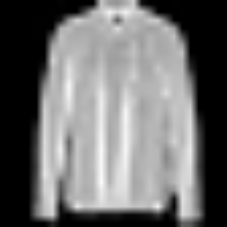

In [28]:
show_tensor_image(img2)